In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import plotly.express as px


sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)


In [2]:
# --- Load Data ---
country = "togo-dapaong_qc"  
data_path = f"../data/{country}.csv"

df = pd.read_csv(data_path)

# Show first 5 rows
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
# --- Basic Info ---
print("Shape:", df.shape)
df.info()


display(df.describe())

missing = df.isna().sum().sort_values(ascending=False)
print("Missing values:\n", missing)
print("\nColumns with >5% missing:\n", missing[missing > 0.05 * len(df)])


Shape: (525600, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB    

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


Missing values:
 Comments         525600
GHI                   0
Timestamp             0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

Columns with >5% missing:
 Comments    525600
dtype: int64


In [4]:
# Columns to check for outliers
key_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[key_cols], nan_policy='omit'))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outlier rows detected: {outliers.sum()}")


df_clean = df[~outliers].copy()

# Impute remaining missing values in key columns with median
df_clean[key_cols] = df_clean[key_cols].fillna(df_clean[key_cols].median())


df_clean.to_csv(f"../data/{country}_clean.csv", index=False)
print(f"Cleaned data saved to ../data/{country}_clean.csv")


Number of outlier rows detected: 9251
Cleaned data saved to ../data/togo-dapaong_qc_clean.csv


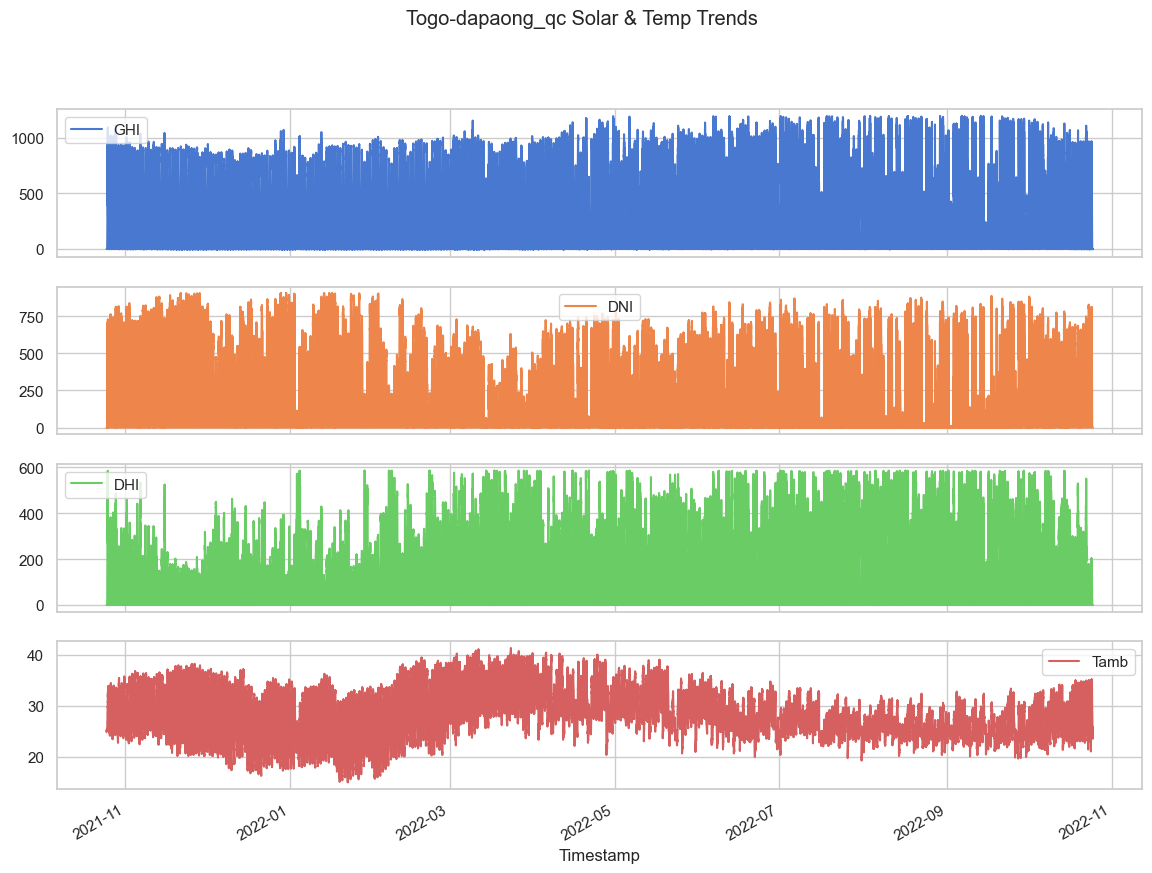

In [5]:
# Convert timestamp to datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

# Plot time series for solar radiation and temperature
cols_to_plot = ["GHI", "DNI", "DHI", "Tamb"]
df_clean[cols_to_plot].plot(subplots=True, figsize=(14,10), title=f"{country.capitalize()} Solar & Temp Trends")
plt.show()


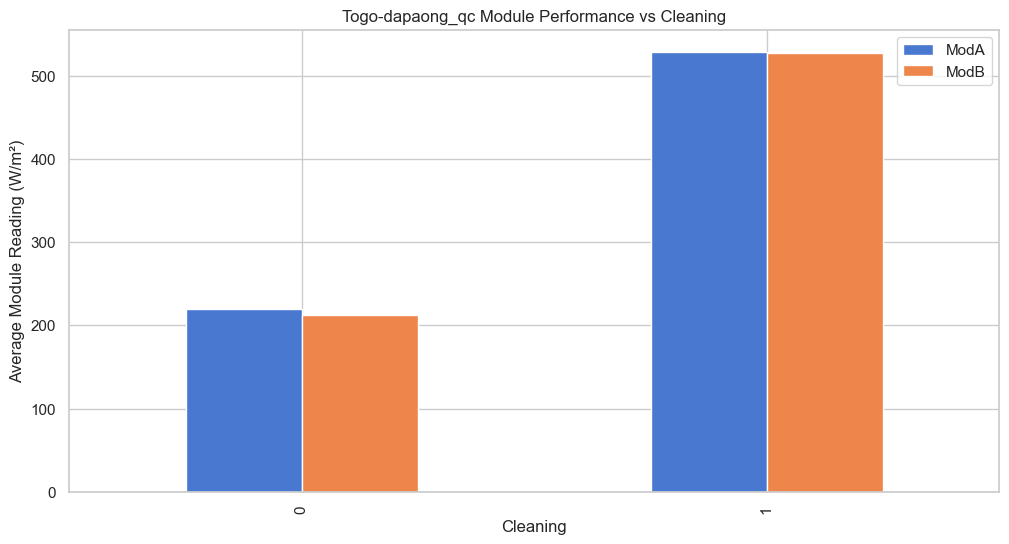

In [6]:
# Average module readings pre/post-clean
clean_avg = df_clean.groupby("Cleaning")[["ModA", "ModB"]].mean()
clean_avg.plot(kind="bar", title=f"{country.capitalize()} Module Performance vs Cleaning")
plt.ylabel("Average Module Reading (W/m²)")
plt.show()


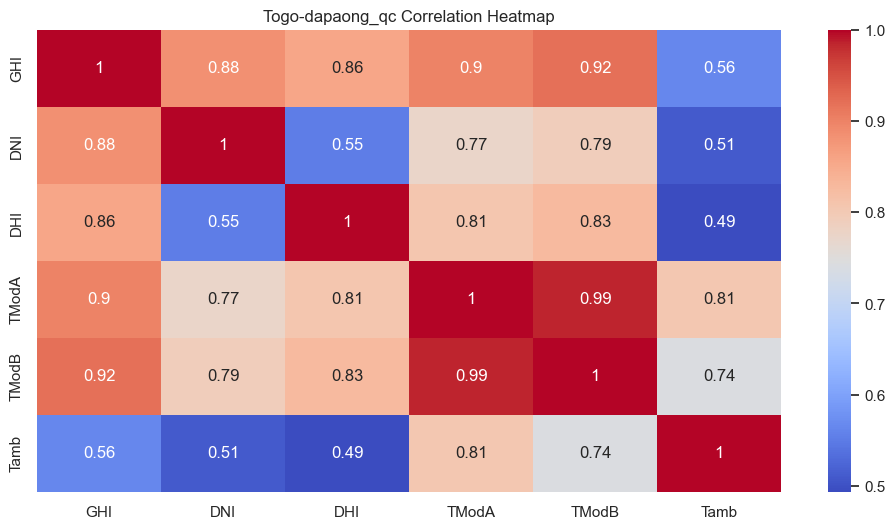

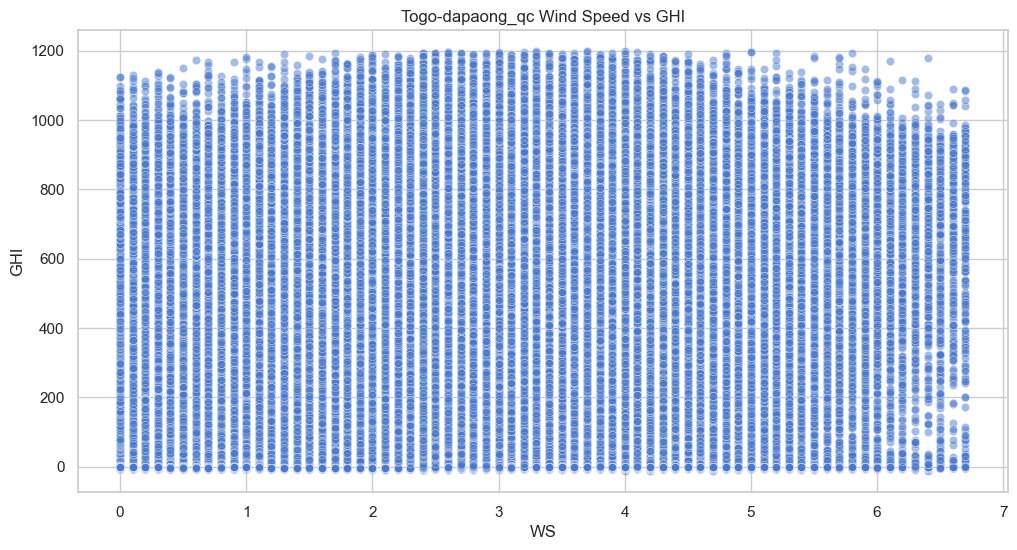

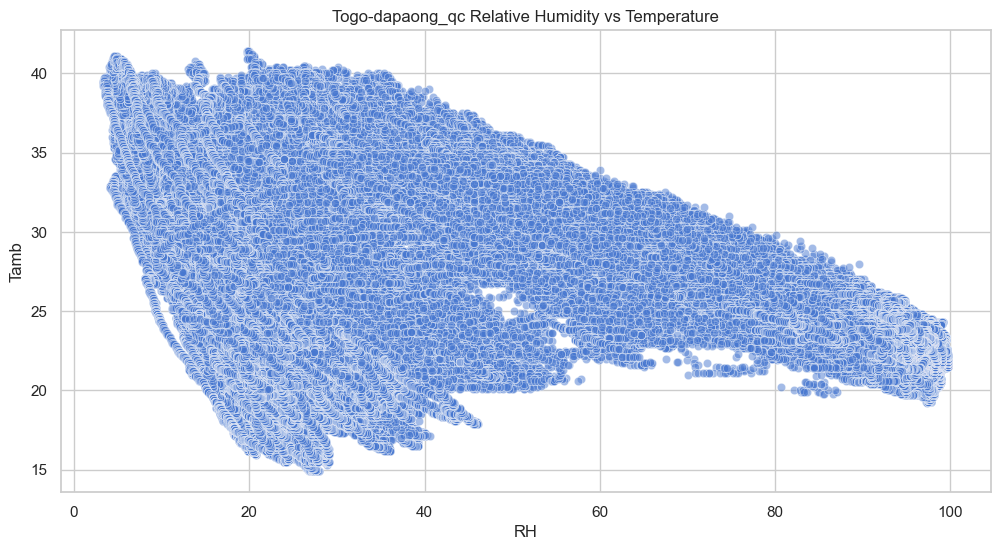

In [7]:
# Correlation heatmap
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB", "Tamb"]
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title(f"{country.capitalize()} Correlation Heatmap")
plt.show()

# Scatter plots examples
sns.scatterplot(data=df_clean, x="WS", y="GHI", alpha=0.5)
plt.title(f"{country.capitalize()} Wind Speed vs GHI")
plt.show()

sns.scatterplot(data=df_clean, x="RH", y="Tamb", alpha=0.5)
plt.title(f"{country.capitalize()} Relative Humidity vs Temperature")
plt.show()


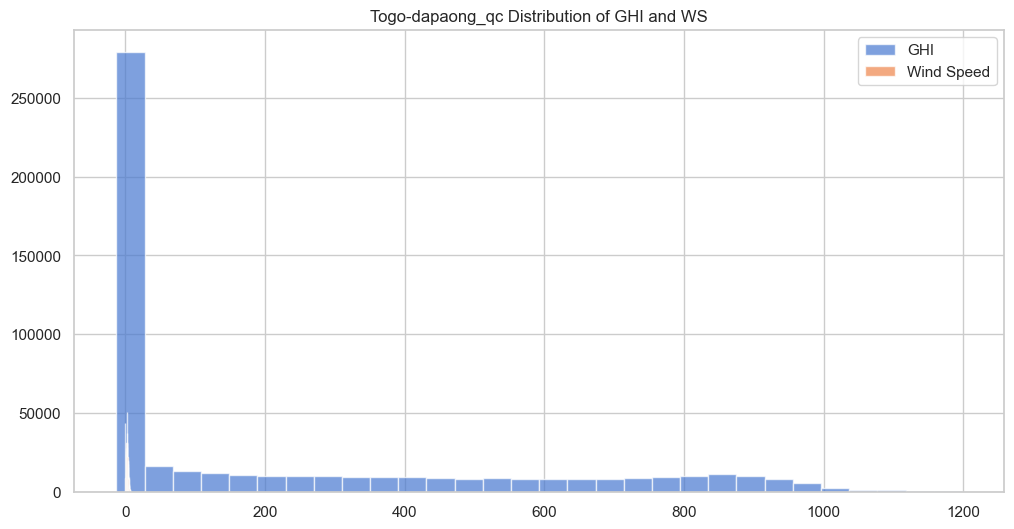

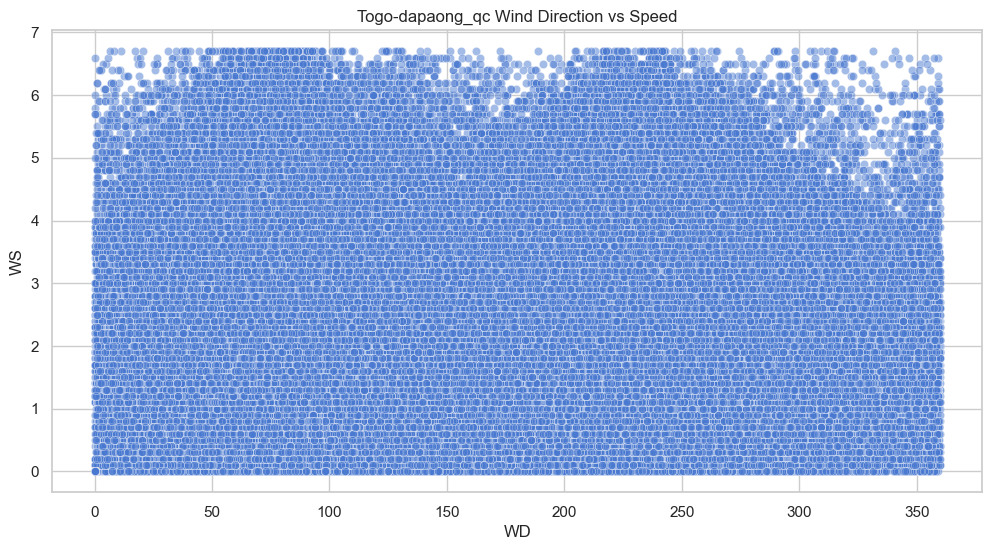

In [8]:
# Histogram of GHI
df_clean["GHI"].hist(bins=30, alpha=0.7, label="GHI")
df_clean["WS"].hist(bins=30, alpha=0.7, label="Wind Speed")
plt.legend()
plt.title(f"{country.capitalize()} Distribution of GHI and WS")
plt.show()

# Wind direction vs speed scatter
sns.scatterplot(data=df_clean, x="WD", y="WS", alpha=0.5)
plt.title(f"{country.capitalize()} Wind Direction vs Speed")
plt.show()


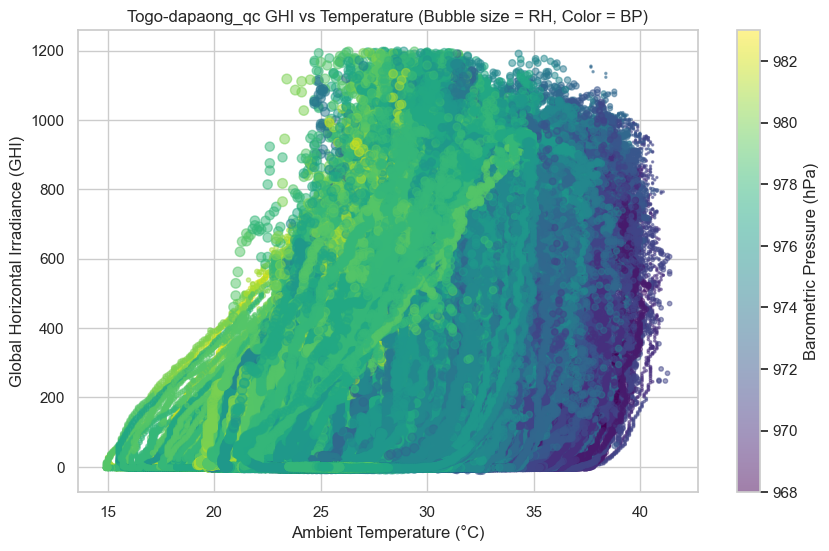

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean["Tamb"], df_clean["GHI"], 
            s=df_clean["RH"]*0.5, alpha=0.5, c=df_clean["BP"], cmap="viridis")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (GHI)")
plt.title(f"{country.capitalize()} GHI vs Temperature (Bubble size = RH, Color = BP)")
plt.colorbar(label="Barometric Pressure (hPa)")
plt.show()
